### Aula 10 - Regressão linear simples

#### Exercício 1: Faça uma análise de regressão linear simples para o conjunto de dados de peso e altura.

O objetivo é verificar se existe (e qual é a) relação entre Peso e Altura dos alunos?

In [10]:
peso <- c(54.50,43.00,72.00,77.00,76.00,83.00,78000,90.00,59000,75.4,120.00,43.00,88.00)
altura <- c(1.61,1.57,1.77,1.75,1.83,1.69,1.91,1.75,1.72,1.68,1.92,1.58,1.77)

table <- data.frame(cbind(peso,altura))
names(table) <- c("peso","altura")
table
summary(table)

peso,altura
54.5,1.61
43.0,1.57
72.0,1.77
77.0,1.75
76.0,1.83
83.0,1.69
78000.0,1.91
90.0,1.75
59000.0,1.72
75.4,1.68


      peso           altura     
 Min.   :   43   Min.   :1.570  
 1st Qu.:   72   1st Qu.:1.680  
 Median :   77   Median :1.750  
 Mean   :10602   Mean   :1.735  
 3rd Qu.:   90   3rd Qu.:1.770  
 Max.   :78000   Max.   :1.920  

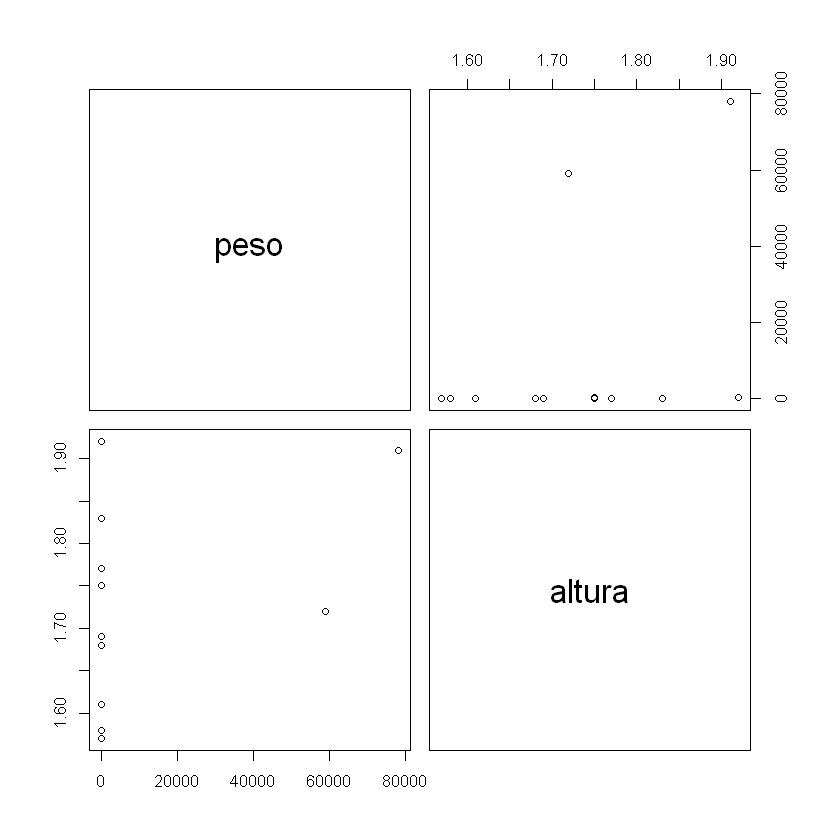

In [22]:
pairs(table)

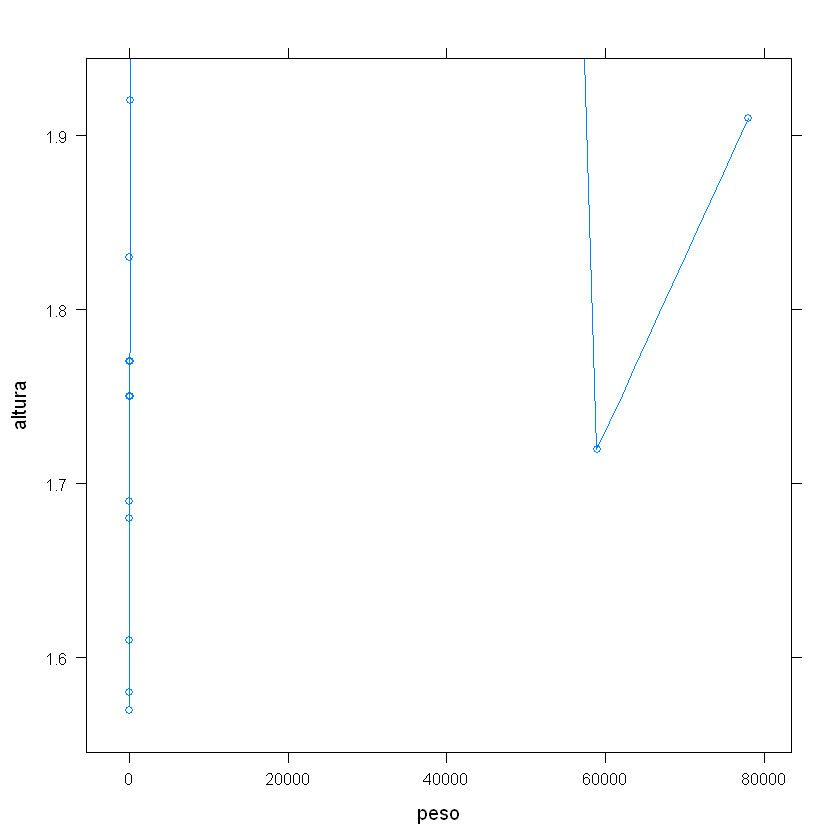

In [115]:
xyplot(altura~peso, data=table, type=c("p","smooth"))

Teste de Shapiro para normalidade 


	Shapiro-Wilk normality test

data:  table$altura
W = 0.94985, p-value = 0.596



	Shapiro-Wilk normality test

data:  table$peso
W = 0.46524, p-value = 5.578e-06


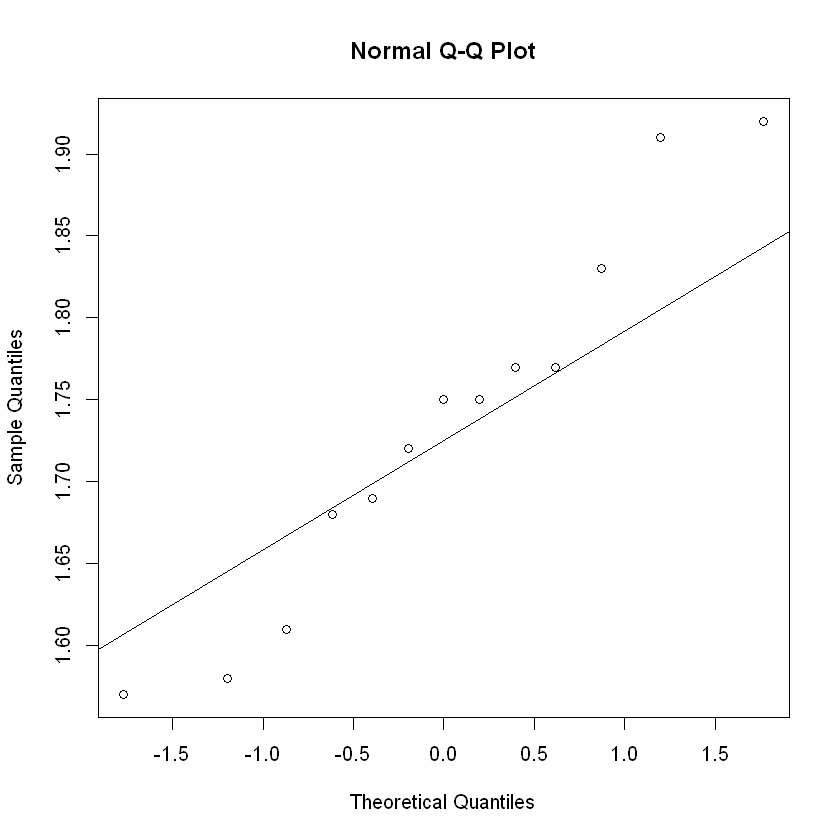

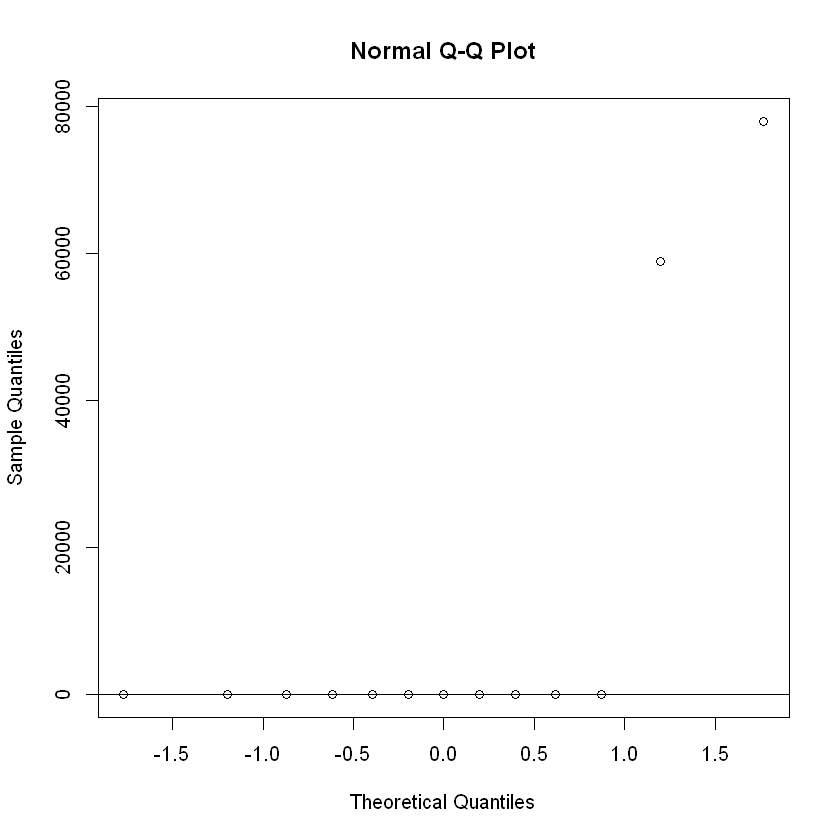

In [20]:
shapiro.test(table$altura)
qqnorm(table$altura)
qqline(table$altura)

shapiro.test(table$peso)
qqnorm(table$peso)
qqline(table$peso)

Segundo o teste de shapiro para normalidade, apenas altura segue uma distribuição normal. Vamos seguir o estudo com os dados e mais tarde analisaremos sem os outliers.

In [24]:
cor(peso,altura)

[1] 0.3692318

In [26]:
#Teste apresenta p-value > 0.05 portanto não rejeita-se a hipótese nula. A correlação não existe. #H0:r=0
cor.test(peso,altura)


	Pearson's product-moment correlation

data:  peso and altura
t = 1.3177, df = 11, p-value = 0.2144
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.2281734  0.7646548
sample estimates:
      cor 
0.3692318 


In [11]:
# Testa H0: B1=0
# Pelos resultados da análise da variância, podemos concluir que os pesos 
# não interferiram no altura (p-valor=0.2143). Então o modelo é estatísticamente fraco.
modelo0 = lm(peso~altura)
anova(modelo0)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
altura,1,1104825102,1104825102,1.736378,0.2143827
Residuals,11,6999096956,636281541,NA,NA


In [57]:
summary(modelo0)


Call:
lm(formula = altura ~ peso)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.14790 -0.09122  0.03202  0.05205  0.20197 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 1.718e+00  3.258e-02  52.723 1.41e-14 ***
peso        1.583e-06  1.201e-06   1.318    0.214    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.1081 on 11 degrees of freedom
Multiple R-squared:  0.1363,	Adjusted R-squared:  0.05782 
F-statistic: 1.736 on 1 and 11 DF,  p-value: 0.2144


In [61]:
R2=summary(modelo0)$r.squared 
R2

[1] 0.1363321

In [62]:
COEF=summary(modelo0)$coefficients # Mostra a tabela dos coeficientes da regressão, 
                              # Std. Error das estimativas dos coeficientes de regressão

# Intervalos de Confiança para β0 e β1
IC_betas=confint(modelo0)
tab<-cbind(COEF,IC_betas)
rownames(tab)<-c("β0","β1")
tab

,Estimate,Std. Error,t value,Pr(>|t|),2.5 %,97.5 %
ß0,-138804.63,113598.35,-1.221890,0.2472881,-388832.91,111223.6
ß1,86132.24,65364.76,1.317717,0.2143827,-57734.62,229999.1


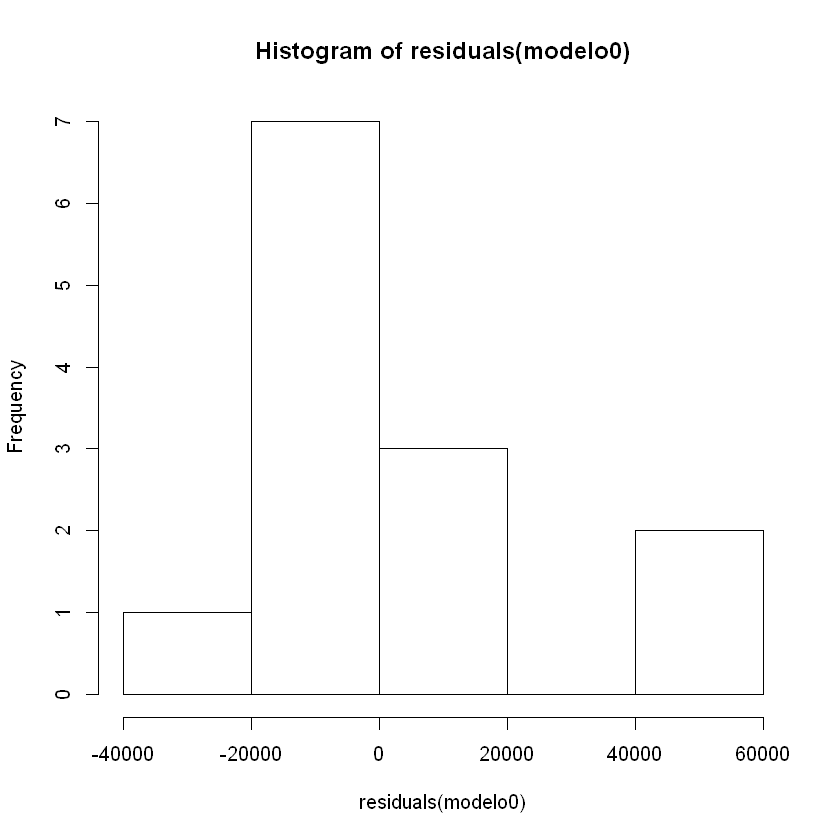

In [44]:
hist(residuals(modelo0)); 

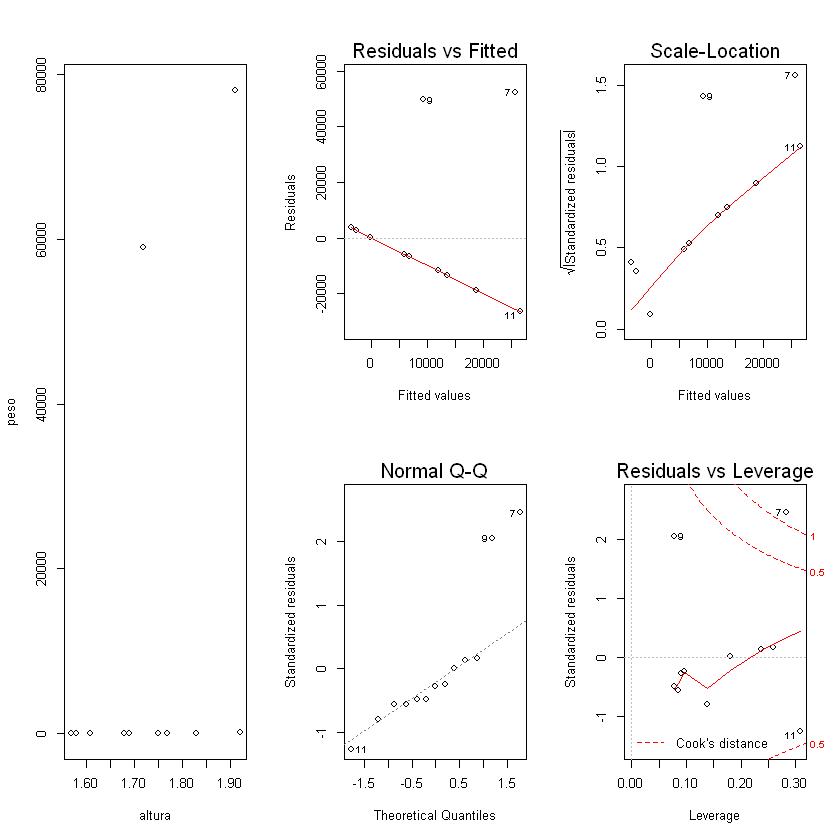

In [46]:
## Resultado
## Nos plots do modelo, analisamos:
# 1º gráfico: Quão bom foi o ajuste 
# 2º gráfico: Normalidade pelo qqplot
# 3º gráfico: Heterogeneidade (visualmente eles devem se distribuir 
                               # igualmente abaixo e acima da linha)
# 4º gráfico: Pontos de alavancagem (outliers)
layout(matrix(c(1,1,2,3,4,5),2,3))
plot(peso~altura)
lines(fitted(modelo0)~peso, table, col=2)
plot(modelo0);layout(1);

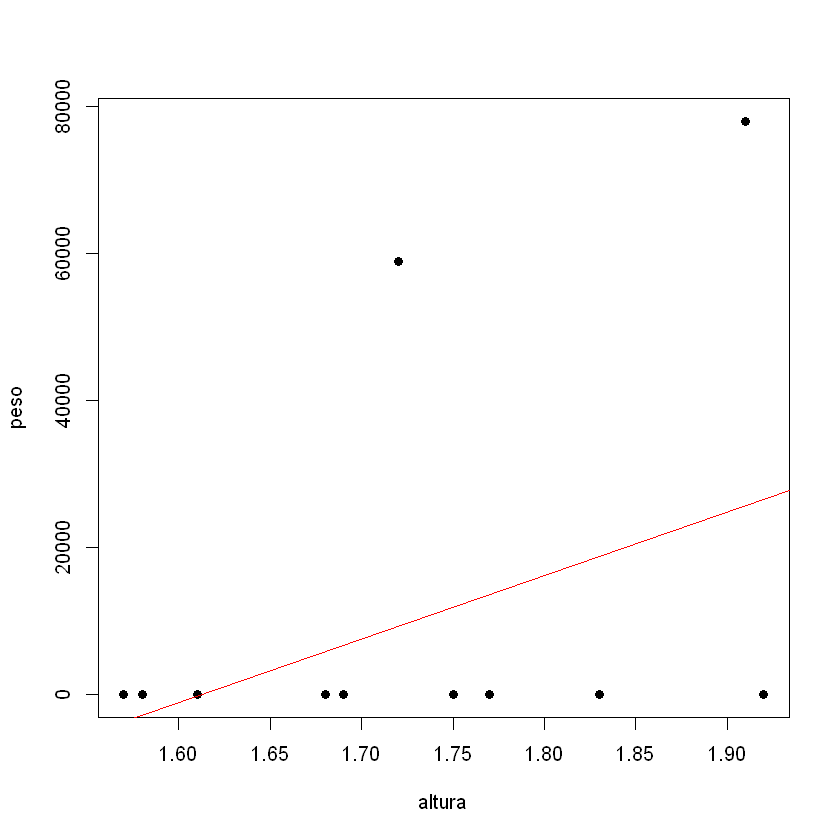

In [106]:
plot (peso ~ altura,pch=16 ,data = table)
abline(modelo0,col="red") 

In [49]:
shapiro.test(residuals(modelo0)) 


	Shapiro-Wilk normality test

data:  residuals(modelo0)
W = 0.77236, p-value = 0.00326


Pelo teste de shapiro os resíduos não apresentam distruibuição normal

## Conclusão

Portanto, como no modelo estimado y_est = -138805 -86132.24x não foi signiﬁcativo, conclui-se que peso e altura não apresentam relação entre si.

## A seguir segue análise sem outliers

In [2]:
peso1 <- c(54.50,43.00,72.00,77.00,76.00,83.00,90.00,75.4,120.00,43.00,88.00)
altura1 <- c(1.61,1.57,1.77,1.75,1.83,1.69,1.75,1.68,1.92,1.58,1.77)

table1 <- data.frame(cbind(peso1,altura1))
names(table1) <- c("peso","altura")
table
summary(table1)

function (..., exclude = if (useNA == "no") c(NA, NaN), useNA = c("no", 
    "ifany", "always"), dnn = list.names(...), deparse.level = 1) 
{
    list.names <- function(...) {
        l <- as.list(substitute(list(...)))[-1L]
        nm <- names(l)
        fixup <- if (is.null(nm)) 
            seq_along(l)
        else nm == ""
        dep <- vapply(l[fixup], function(x) switch(deparse.level + 
            1, "", if (is.symbol(x)) as.character(x) else "", 
            deparse(x, nlines = 1)[1L]), "")
        if (is.null(nm)) 
            dep
        else {
            nm[fixup] <- dep
            nm
        }
    }
    miss.use <- missing(useNA)
    miss.exc <- missing(exclude)
    useNA <- if (miss.use && !miss.exc && !match(NA, exclude, 
        nomatch = 0L)) 
        "ifany"
    else match.arg(useNA)
    doNA <- useNA != "no"
    if (!miss.use && !miss.exc && doNA && match(NA, exclude, 
        nomatch = 0L)) 
        warning("'exclude' containing NA and 'useNA' != \"no\"' are a bit contradicting")
    args <- list(...)
    if (!length(args)) 
        stop("nothing to tabulate")
    if (length(args) == 1L && is.list(args[[1L]])) {
        args <- args[[1L]]
        if (length(dnn) != length(args)) 
            dnn <- if (!is.null(argn <- names(args))) 
                argn
            else paste(dnn[1L], seq_along(args), sep = ".")
    }
    bin <- 0L
    lens <- NULL
    dims <- integer()
    pd <- 1L
    dn <- NULL
    for (a in args) {
        if (is.null(lens)) 
            lens <- length(a)
        else if (length(a) != lens) 
            stop("all arguments must have the same length")
        fact.a <- is.factor(a)
        if (doNA) 
            aNA <- anyNA(a)
        if (!fact.a) {
            a0 <- a
            a <- factor(a, exclude = exclude)
        }
        add.na <- doNA
        if (add.na) {
            ifany <- (useNA == "ifany")
            anNAc <- anyNA(a)
            add.na <- if (!ifany || anNAc) {
                ll <- levels(a)
                if (add.ll <- !anyNA(ll)) {
                  ll <- c(ll, NA)
                  TRUE
                }
                else if (!ifany && !anNAc) 
                  FALSE
                else TRUE
            }
            else FALSE
        }
        if (add.na) 
            a <- factor(a, levels = ll, exclude = NULL)
        else ll <- levels(a)
        a <- as.integer(a)
        if (fact.a && !miss.exc) {
            ll <- ll[keep <- which(match(ll, exclude, nomatch = 0L) == 
                0L)]
            a <- match(a, keep)
        }
        else if (!fact.a && add.na) {
            if (ifany && !aNA && add.ll) {
                ll <- ll[!is.na(ll)]
                is.na(a) <- match(a0, c(exclude, NA), nomatch = 0L) > 
                  0L
            }
            else {
                is.na(a) <- match(a0, exclude, nomatch = 0L) > 
                  0L
            }
        }
        nl <- length(ll)
        dims <- c(dims, nl)
        if (prod(dims) > .Machine$integer.max) 
            stop("attempt to make a table with >= 2^31 elements")
        dn <- c(dn, list(ll))
        bin <- bin + pd * (a - 1L)
        pd <- pd * nl
    }
    names(dn) <- dnn
    bin <- bin[!is.na(bin)]
    if (length(bin)) 
        bin <- bin + 1L
    y <- array(tabulate(bin, pd), dims, dimnames = dn)
    class(y) <- "table"
    y
}
<bytecode: 0x00000000522b8800>
<environment: namespace:base>

      peso            altura     
 Min.   : 43.00   Min.   :1.570  
 1st Qu.: 63.25   1st Qu.:1.645  
 Median : 76.00   Median :1.750  
 Mean   : 74.72   Mean   :1.720  
 3rd Qu.: 85.50   3rd Qu.:1.770  
 Max.   :120.00   Max.   :1.920  

In [3]:
xyplot(altura1~peso1, data=table1, type=c("p","r"))

ERROR: Error in xyplot(altura1 ~ peso1, data = table1, type = c("p", "r")): não foi possível encontrar a função "xyplot"


In [4]:
cor.test(peso1,altura1)


	Pearson's product-moment correlation

data:  peso1 and altura1
t = 5.961, df = 9, p-value = 0.0002124
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.6320669 0.9721901
sample estimates:
      cor 
0.8932545 


In [5]:
modelo1 = lm(peso1~altura1,data = table1)
anova(modelo1)

summary(modelo1)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
altura1,1,3961.221,3961.2215,35.5332,0.0002124482
Residuals,9,1003.315,111.4794,NA,NA



Call:
lm(formula = peso1 ~ altura1, data = table1)

Residuals:
     Min       1Q   Median       3Q      Max 
-19.0806  -4.8769   0.1442   8.1728  13.8352 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  -243.68      53.51  -4.554 0.001378 ** 
altura1       185.11      31.05   5.961 0.000212 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 10.56 on 9 degrees of freedom
Multiple R-squared:  0.7979,	Adjusted R-squared:  0.7754 
F-statistic: 35.53 on 1 and 9 DF,  p-value: 0.0002124



	Shapiro-Wilk normality test

data:  residuals(modelo1)
W = 0.9603, p-value = 0.7754


ERROR: Error in dwtest(modelo1, alternative = "two.sided"): não foi possível encontrar a função "dwtest"


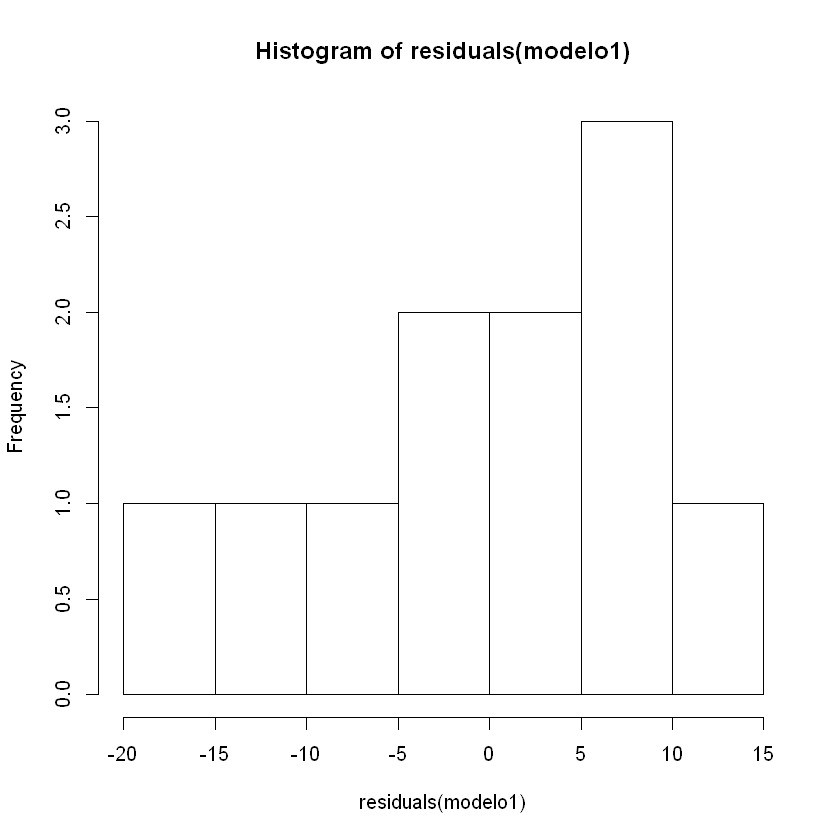

In [6]:
hist(residuals(modelo1)); 

#Não rejeito hipótese nula. Apresenta normalidade.
shapiro.test(residuals(modelo1)) 



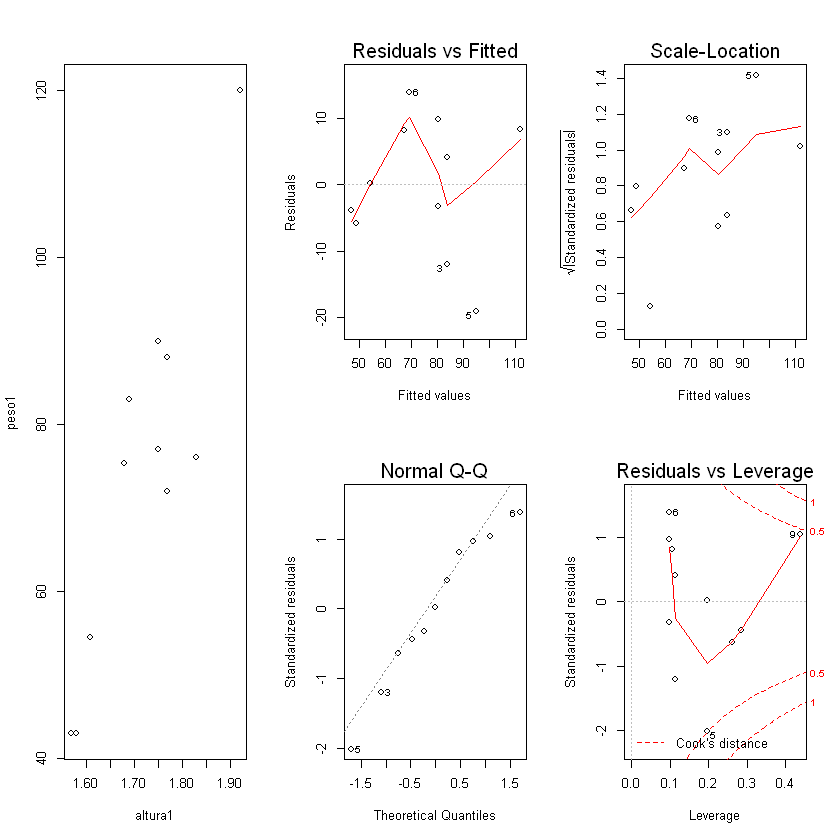

In [93]:
layout(matrix(c(1,1,2,3,4,5),2,3))
plot(peso1~altura1)
lines(fitted(modelo1)~peso, table, col=2)
plot(modelo1);layout(1);

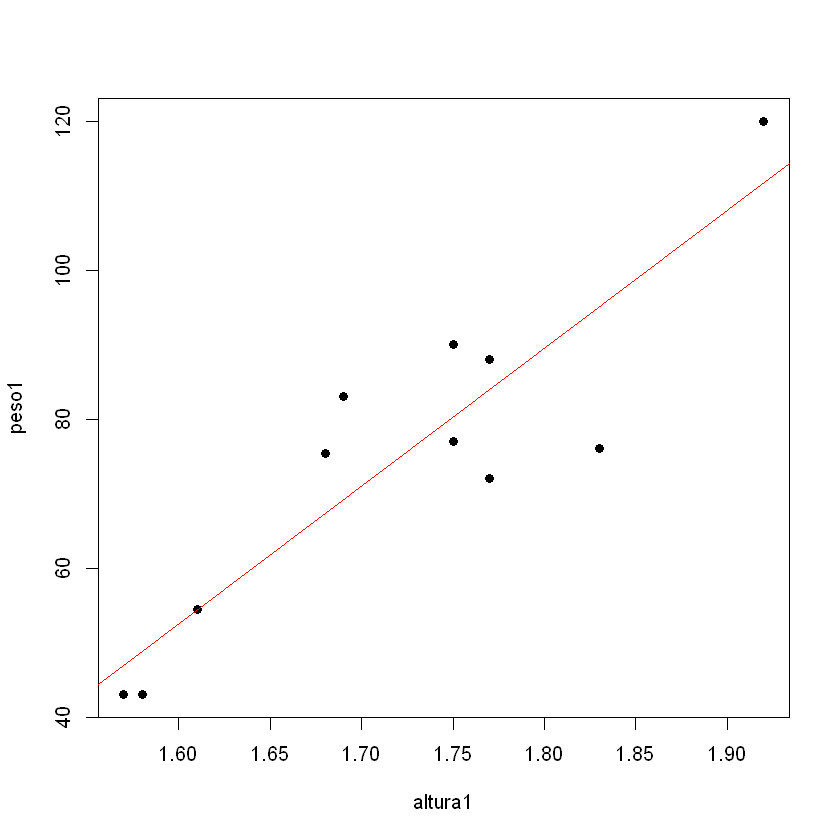

In [99]:
plot (peso1 ~ altura1,pch=16 ,data = table1)
abline(modelo1,col="red") 


`geom_smooth()` using formula 'y ~ x'


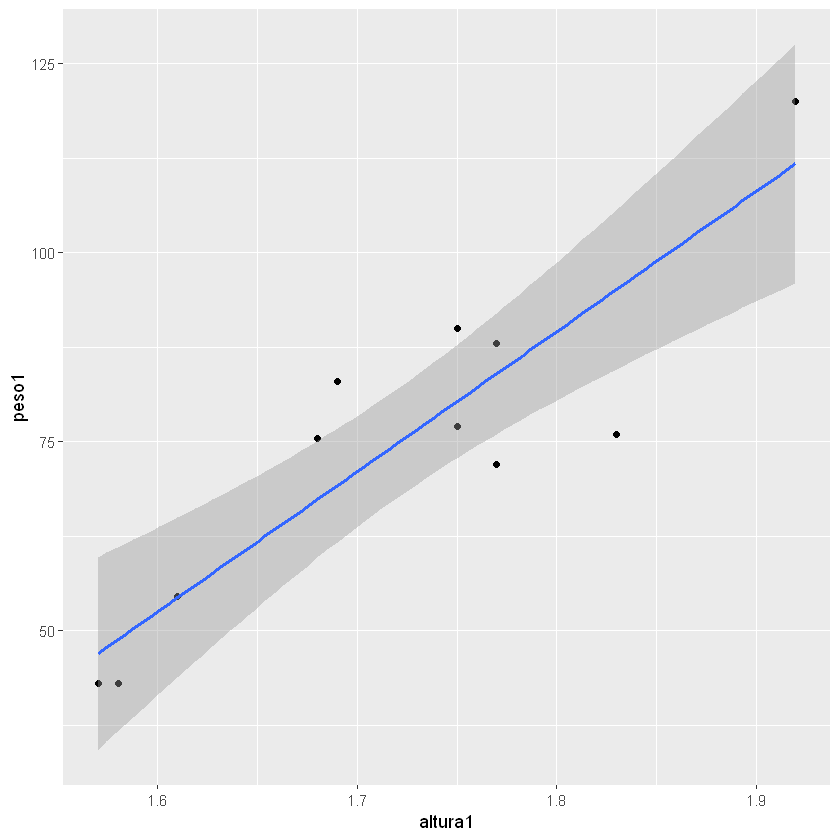

In [101]:
ggplot(data=table1,aes(y=peso1,x=altura1))+geom_point()+geom_smooth(method="lm")

### Conclusão

Segundo testes de normalidade e variância, peso e altura tem relação entre si segundo equação: y = -243.68 + 185.11x
